# 2_Logistic_Regression

In [32]:
import torch
import numpy as np
from torch.autograd import Variable
import torch.nn as nn
import matplotlib.pyplot as plt # Needs for Ploting
%matplotlib inline
torch.manual_seed(888)    # reproducible

## Prepare Data

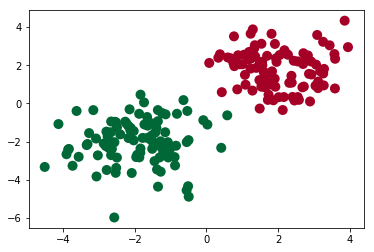

tensor([[ 1.9233,  0.8776,  0.0000],
        [ 1.8682,  0.1658,  0.0000],
        [ 2.5491,  0.3336,  0.0000],
        [ 1.0085,  2.0562,  0.0000],
        [ 1.6976,  0.9487,  0.0000],
        [ 1.4894,  2.1460,  0.0000],
        [ 0.3763,  2.5749,  0.0000],
        [ 3.4396,  3.0438,  0.0000],
        [ 1.9560,  2.1769,  0.0000],
        [ 0.7679,  3.5142,  0.0000],
        [ 2.1770,  2.7858,  0.0000],
        [ 3.2745,  0.9453,  0.0000],
        [ 1.7331,  1.4741,  0.0000],
        [ 1.6297,  0.8627,  0.0000],
        [ 1.2333,  3.6529,  0.0000],
        [ 1.6571,  1.1602,  0.0000],
        [ 1.0911,  0.9823,  0.0000],
        [ 1.6068,  0.8801,  0.0000],
        [ 3.1155,  0.8023,  0.0000],
        [ 0.7772,  1.9543,  0.0000],
        [ 1.2300,  1.8254,  0.0000],
        [ 2.4562,  0.1563,  0.0000],
        [ 1.5602,  2.0071,  0.0000],
        [ 1.8164,  3.6474,  0.0000],
        [ 1.8297,  1.6803,  0.0000],
        [ 2.1608,  0.3367,  0.0000],
        [ 1.7141,  0.1869,  0.0000],
 

In [33]:
# make fake data
n_data = torch.ones(100, 2)

x0 = torch.normal(2*n_data, 1)        # class0 x data (tensor), shape=(100, 2)   mu=(2,2), var =1
y0 = torch.zeros(100,1)               # class0 y data (tensor), shape=(100, 1)

x1 = torch.normal(-2*n_data, 1)       # class1 x data (tensor), shape=(100, 2)   mu=(-2,2), var=1
y1 = torch.ones(100,1)                # class1 y data (tensor), shape=(100, 1)

x = torch.cat((x0, x1)).type(torch.FloatTensor)    # shape (200, 2) FloatTensor = 32-bit floating
y = torch.cat((y0, y1)).type(torch.FloatTensor)    # shape (200, 1) FloatTensor = 32-bit integer

plt.scatter(x.data.numpy()[:,0], x.data.numpy()[:,1], c=y.squeeze().numpy(), s=100, lw=0, cmap='RdYlGn')
plt.show()

torch.cat((x, y),dim=1)

### Define Logistic Regression Model

In [34]:
# Hypothesis using sigmoid and linear model
linear  =  nn.Linear(2, 1, bias=True)
sigmoid = nn.Sigmoid()
model   = nn.Sequential(linear, sigmoid)

In [35]:
model.state_dict()

OrderedDict([('0.weight', tensor([[-0.2059,  0.3944]])),
             ('0.bias', tensor([ 0.3111]))])

### Define Optimizer and Cost Function

In [36]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
cost_fn = nn.BCELoss() #Binary Cross Entropy Costfunction
#cost_fn = -(y * torch.log(prob) + (1 - y)* torch.log(1 - prob) ).mean() 

### Train 

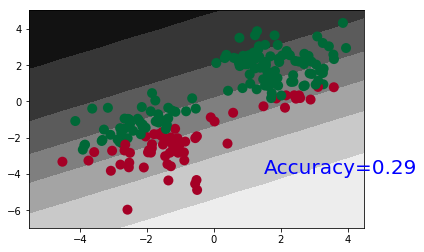

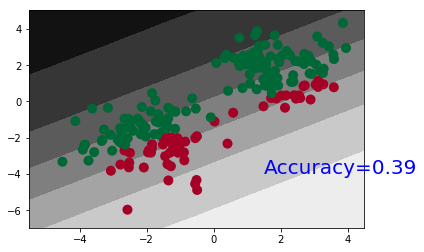

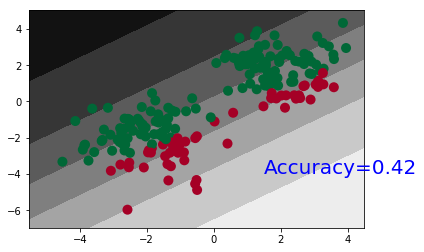

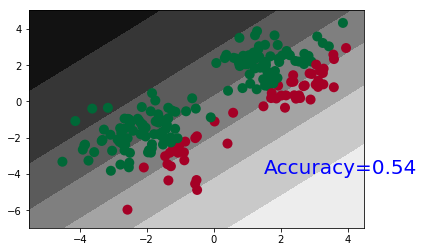

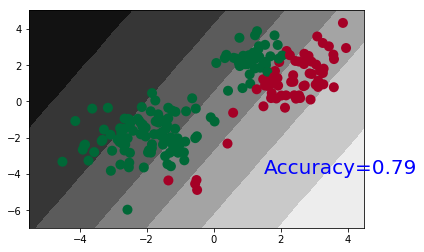

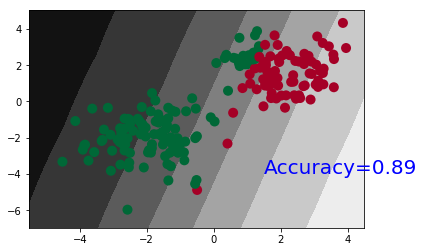

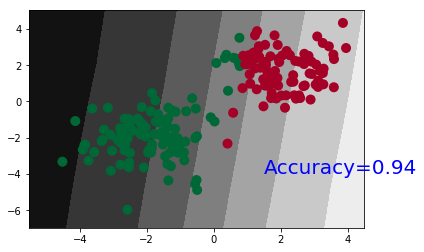

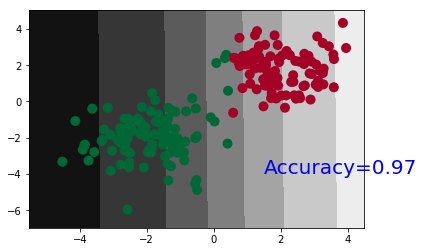

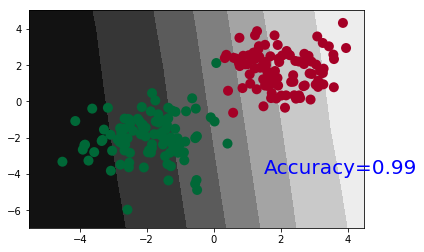

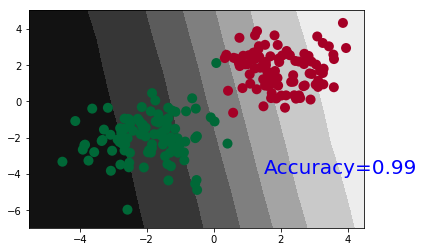

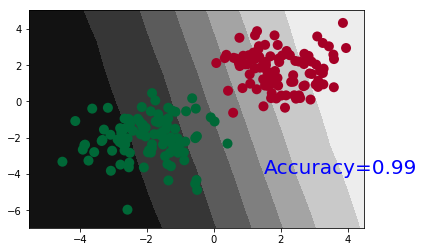

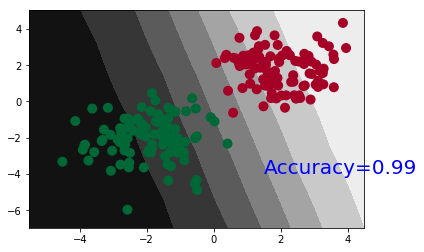

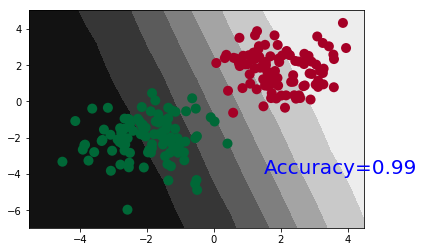

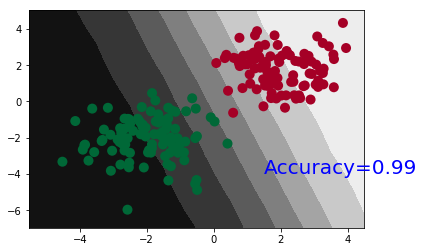

In [37]:
plt.ion()   # something about plotting

for t in range(120):   

    prob = model(x)                 # input x and predict based on x
    cost = cost_fn(prob, y)
    
    optimizer.zero_grad()         # clear gradients for next train
    cost.backward()               # compute gradients
    optimizer.step()              # apply gradients
    
    # ----------------------------------------------------------------------#
    # Ploting
    if t % 10 == 0 or t in [3, 6]:
        # plot and show learning process
        plt.cla()
        prediction = prob.gt(0.5)
        pred_y = prediction.data.numpy().squeeze()
        target_y = y.data.squeeze(1).numpy()
        
        # Draw massgrid
        x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
        y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min.data.numpy(), x_max.data.numpy(), 1),
                             np.arange(y_min.data.numpy(), y_max.data.numpy(), 1))

        # here "model" is your model's prediction (classification) function
        Z = model(torch.from_numpy(np.c_[xx.ravel(), yy.ravel()]).float())

        # Put the result into a color plot
        Z = Z.view(xx.shape)
        plt.contourf(xx, yy, Z.data.numpy(), cmap=plt.cm.binary)
        #plt.axis('off')

        # Plot also the training points
        #plt.scatter(x[:, 0].data.numpy(), x[:, 1].data.numpy(), c=pred_y, cmap='RdYlGn')      
        plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=pred_y, s=100, lw=0, cmap='RdYlGn')

        accuracy = sum(pred_y == target_y)/200.
        plt.text(1.5, -4, 'Accuracy=%.2f' % accuracy, fontdict={'size': 20, 'color':  'Blue'})
        plt.show()
        plt.pause(0.1)
        
plt.ioff()

In [38]:
model.state_dict()

OrderedDict([('0.weight', tensor([[-0.7685, -0.2420]])),
             ('0.bias', tensor([ 0.2565]))])

### Prediction (Test)

In [39]:
a_sample = torch.ones(1, 2)
x_new = torch.normal(2*a_sample, 1)        # sample x_new ~ Gaussian( mu=(2,2), var=diag(1,1))  (class0) 

In [40]:
y_pred = model(x_new)

In [41]:
y_pred                                               # probability of class1

tensor([[ 0.4706]])

In [42]:
1-y_pred                                             # probability of class0

tensor([[ 0.5294]])

### Draw Sample from Logistic Regression ??
We can't draw sample from logistic regresion 
Because it is a discriminative model..